# Library

In [1]:
# conda install pandas # or !pip install pandas
# !pip install requests
# !pip install matplotlib
# !pip install plotly
# !pip install scipy

In [2]:
# !pip install nbformat --upgrade

In [3]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import requests

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.express as px

from scipy.interpolate import griddata

# Load Data(ID : 4hhb)

In [5]:
# 네임스페이스 등록
namespaces = {'PDBx': 'http://pdbml.pdb.org/schema/pdbx-v50.xsd'}

# XML 파일 열기
tree = ET.parse("C:/Users/kbjoo/Downloads/4hhb.xml")
root = tree.getroot()

# 예: atom_site 항목 하나씩 순회
for atom_site in root.findall('.//PDBx:atom_site', namespaces):
    atom_id = atom_site.attrib.get('id')
    atom_name = atom_site.find('PDBx:auth_atom_id', namespaces).text
    res_name = atom_site.find('PDBx:auth_comp_id', namespaces).text
    x = atom_site.find('PDBx:Cartn_x', namespaces).text
    y = atom_site.find('PDBx:Cartn_y', namespaces).text
    z = atom_site.find('PDBx:Cartn_z', namespaces).text

    auth_asym_id = atom_site.find('PDBx:auth_asym_id', namespaces).text
    auth_seq_id = atom_site.find('PDBx:auth_seq_id', namespaces).text
    pdbx_PDB_model_num = atom_site.find('PDBx:pdbx_PDB_model_num', namespaces).text
    label_entity_id = atom_site.find('PDBx:label_entity_id', namespaces).text

    group_PDB = atom_site.find('PDBx:group_PDB', namespaces).text
    
    print(f'ID: {atom_id}, Atom: {atom_name}, Residue: {res_name}, Coords: ({x}, {y}, {z})')

ID: 1, Atom: N, Residue: VAL, Coords: (19.323, 29.727, 42.781)
ID: 2, Atom: CA, Residue: VAL, Coords: (20.141, 30.469, 42.414)
ID: 3, Atom: C, Residue: VAL, Coords: (21.664, 29.857, 42.548)
ID: 4, Atom: O, Residue: VAL, Coords: (21.985, 29.541, 43.704)
ID: 5, Atom: CB, Residue: VAL, Coords: (19.887, 31.918, 43.524)
ID: 6, Atom: CG1, Residue: VAL, Coords: (20.656, 32.850, 42.999)
ID: 7, Atom: CG2, Residue: VAL, Coords: (18.692, 31.583, 43.506)
ID: 8, Atom: N, Residue: LEU, Coords: (22.284, 30.338, 41.520)
ID: 9, Atom: CA, Residue: LEU, Coords: (23.773, 29.985, 41.873)
ID: 10, Atom: C, Residue: LEU, Coords: (24.698, 31.236, 42.725)
ID: 11, Atom: O, Residue: LEU, Coords: (24.359, 32.232, 42.013)
ID: 12, Atom: CB, Residue: LEU, Coords: (24.180, 29.902, 40.374)
ID: 13, Atom: CG, Residue: LEU, Coords: (24.177, 28.761, 39.582)
ID: 14, Atom: CD1, Residue: LEU, Coords: (24.140, 27.432, 40.098)
ID: 15, Atom: CD2, Residue: LEU, Coords: (24.210, 28.919, 37.923)
ID: 16, Atom: N, Residue: SER, Coord

## EDA
✅ EDA의 주요 목적
1. 데이터의 전반적인 구조 파악
    - 변수의 수, 데이터 타입, 결측치, 이상치 존재 여부 등
2. 이상치 및 오류 탐지
    - 논리적 오류나 비정상적으로 벗어난 값 탐색
3. 데이터 분포와 통계 요약
    - 평균, 중앙값, 분산, 최소/최대값 등 기초 통계량 확인
4. 변수 간 관계 탐색
    - 상관관계, 그룹별 분포, 범주형 변수와 수치형 변수의 관계 등
5. 모델링을 위한 가설 수립
    - 어떤 특징이 타겟에 영향을 줄 가능성이 있는지 직관적 판단

In [6]:
len(root.findall('.//PDBx:atom_site', namespaces))

4779

In [7]:
root.findall('.//PDBx:atom_site', namespaces)[:3]

[<Element '{http://pdbml.pdb.org/schema/pdbx-v50.xsd}atom_site' at 0x0000018235273DD0>,
 <Element '{http://pdbml.pdb.org/schema/pdbx-v50.xsd}atom_site' at 0x0000018235298450>,
 <Element '{http://pdbml.pdb.org/schema/pdbx-v50.xsd}atom_site' at 0x0000018235298A40>]

In [8]:
for atom_site in root.findall('.//PDBx:atom_site', namespaces)[:3]:
    atom_id = atom_site.attrib.get('id')
    atom_name = atom_site.find('PDBx:auth_atom_id', namespaces).text
    res_name = atom_site.find('PDBx:auth_comp_id', namespaces).text
    x = float(atom_site.find('PDBx:Cartn_x', namespaces).text)
    y = float(atom_site.find('PDBx:Cartn_y', namespaces).text)
    z = float(atom_site.find('PDBx:Cartn_z', namespaces).text)
    print(type(atom_id), type(atom_name), type(res_name), type(x), type(y), type(z))

<class 'str'> <class 'str'> <class 'str'> <class 'float'> <class 'float'> <class 'float'>
<class 'str'> <class 'str'> <class 'str'> <class 'float'> <class 'float'> <class 'float'>
<class 'str'> <class 'str'> <class 'str'> <class 'float'> <class 'float'> <class 'float'>


### DataFrame 만들기

In [9]:
atom_id_list, atom_name_list, res_name_list, x_list, y_list, z_list = [], [], [], [], [], []
auth_asym_id_list, auth_seq_id_list, pdbx_PDB_model_num_list, label_entity_id_list = [], [], [], []
group_PDB_list = []

for atom_site in root.findall('.//PDBx:atom_site', namespaces):
    atom_id = int(atom_site.attrib.get('id'))
    atom_name = atom_site.find('PDBx:auth_atom_id', namespaces).text
    res_name = atom_site.find('PDBx:auth_comp_id', namespaces).text
    x = atom_site.find('PDBx:Cartn_x', namespaces).text
    y = atom_site.find('PDBx:Cartn_y', namespaces).text
    z = atom_site.find('PDBx:Cartn_z', namespaces).text
    

    auth_asym_id = atom_site.find('PDBx:auth_asym_id', namespaces).text
    auth_seq_id = int(atom_site.find('PDBx:auth_seq_id', namespaces).text)
    pdbx_PDB_model_num = int(atom_site.find('PDBx:pdbx_PDB_model_num', namespaces).text)
    label_entity_id = int(atom_site.find('PDBx:label_entity_id', namespaces).text)

    group_PDB = atom_site.find('PDBx:group_PDB', namespaces).text

    atom_id_list.append(atom_id)
    atom_name_list.append(atom_name)
    res_name_list.append(res_name)
    x_list.append(float(x))
    y_list.append(float(y))
    z_list.append(float(z))

    auth_asym_id_list.append(auth_asym_id)
    auth_seq_id_list.append(auth_seq_id)
    pdbx_PDB_model_num_list.append(pdbx_PDB_model_num)
    label_entity_id_list.append(label_entity_id)
    group_PDB_list.append(group_PDB)

# DataFrame 생성
df = pd.DataFrame({
    'atom_id': atom_id_list,
    'atom_name': atom_name_list,
    'res_name': res_name_list,
    'x': x_list,
    'y': y_list,
    'z': z_list,
    'auth_asym_id': auth_asym_id_list,
    'auth_seq_id': auth_seq_id_list,
    'pdbx_PDB_model_num': pdbx_PDB_model_num_list,
    'label_entity_id': label_entity_id_list,
    'group_PDB': group_PDB_list
})

df

,atom_id,atom_name,res_name,x,y,z,auth_asym_id,auth_seq_id,pdbx_PDB_model_num,label_entity_id,group_PDB
0,1,N,VAL,19.323,29.727,42.781,A,1,1,1,ATOM
1,2,CA,VAL,20.141,30.469,42.414,A,1,1,1,ATOM
2,3,C,VAL,21.664,29.857,42.548,A,1,1,1,ATOM
3,4,O,VAL,21.985,29.541,43.704,A,1,1,1,ATOM
4,5,CB,VAL,19.887,31.918,43.524,A,1,1,1,ATOM
...,...,...,...,...,...,...,...,...,...,...,...
4774,4775,O,HOH,7.704,3.548,14.354,D,193,1,5,HETATM
4775,4776,O,HOH,-12.629,5.336,19.151,D,194,1,5,HETATM
4776,4777,O,HOH,-2.420,24.373,26.217,D,195,1,5,HETATM
4777,4778,O,HOH,-15.654,13.836,26.085,D,196,1,5,HETATM


### 특성 분석

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4779 entries, 0 to 4778
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   atom_id             4779 non-null   int64  
 1   atom_name           4779 non-null   object 
 2   res_name            4779 non-null   object 
 3   x                   4779 non-null   float64
 4   y                   4779 non-null   float64
 5   z                   4779 non-null   float64
 6   auth_asym_id        4779 non-null   object 
 7   auth_seq_id         4779 non-null   int64  
 8   pdbx_PDB_model_num  4779 non-null   int64  
 9   label_entity_id     4779 non-null   int64  
 10  group_PDB           4779 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 410.8+ KB


In [11]:
len(df.atom_id.unique())

4779

In [12]:
df.atom_name.unique()

array(['N', 'CA', 'C', 'O', 'CB', 'CG1', 'CG2', 'CG', 'CD1', 'CD2', 'OG',
       'CD', 'OD1', 'OD2', 'CE', 'NZ', 'OG1', 'ND2', 'NE1', 'CE2', 'CE3',
       'CZ2', 'CZ3', 'CH2', 'ND1', 'CE1', 'NE2', 'OE1', 'OE2', 'CZ', 'OH',
       'NE', 'NH1', 'NH2', 'SD', 'SG', 'OXT', 'CHA', 'CHB', 'CHC', 'CHD',
       'C1A', 'C2A', 'C3A', 'C4A', 'CMA', 'CAA', 'CBA', 'CGA', 'O1A',
       'O2A', 'C1B', 'C2B', 'C3B', 'C4B', 'CMB', 'CAB', 'CBB', 'C1C',
       'C2C', 'C3C', 'C4C', 'CMC', 'CAC', 'CBC', 'C1D', 'C2D', 'C3D',
       'C4D', 'CMD', 'CAD', 'CBD', 'CGD', 'O1D', 'O2D', 'NA', 'NB', 'NC',
       'ND', 'FE', 'P'], dtype=object)

In [13]:
len(df.atom_name.unique())

81

In [14]:
df.res_name.unique()

array(['VAL', 'LEU', 'SER', 'PRO', 'ALA', 'ASP', 'LYS', 'THR', 'ASN',
       'TRP', 'GLY', 'HIS', 'GLU', 'TYR', 'ARG', 'MET', 'PHE', 'GLN',
       'CYS', 'HEM', 'PO4', 'HOH'], dtype=object)

In [15]:
len(df.res_name.unique())

22

### 원소와 용매 분리

In [16]:
df[df['res_name'] == 'HEM']

,atom_id,atom_name,res_name,x,y,z,auth_asym_id,auth_seq_id,pdbx_PDB_model_num,label_entity_id,group_PDB
4384,4385,CHA,HEM,18.675,18.641,20.464,A,142,1,3,HETATM
4385,4386,CHB,HEM,20.996,20.564,24.241,A,142,1,3,HETATM
4386,4387,CHC,HEM,18.666,17.711,27.273,A,142,1,3,HETATM
4387,4388,CHD,HEM,16.693,15.349,23.426,A,142,1,3,HETATM
4388,4389,C1A,HEM,19.403,19.426,21.131,A,142,1,3,HETATM
...,...,...,...,...,...,...,...,...,...,...,...
4553,4554,NA,HEM,-2.975,3.248,23.071,D,148,1,3,HETATM
4554,4555,NB,HEM,-2.569,4.252,25.747,D,148,1,3,HETATM
4555,4556,NC,HEM,-1.102,6.496,24.910,D,148,1,3,HETATM
4556,4557,ND,HEM,-1.471,5.558,22.069,D,148,1,3,HETATM


In [17]:
atom_df = df[df['group_PDB'] == 'ATOM']
atom_df

,atom_id,atom_name,res_name,x,y,z,auth_asym_id,auth_seq_id,pdbx_PDB_model_num,label_entity_id,group_PDB
0,1,N,VAL,19.323,29.727,42.781,A,1,1,1,ATOM
1,2,CA,VAL,20.141,30.469,42.414,A,1,1,1,ATOM
2,3,C,VAL,21.664,29.857,42.548,A,1,1,1,ATOM
3,4,O,VAL,21.985,29.541,43.704,A,1,1,1,ATOM
4,5,CB,VAL,19.887,31.918,43.524,A,1,1,1,ATOM
...,...,...,...,...,...,...,...,...,...,...,...
4379,4380,ND1,HIS,14.250,-3.363,23.467,D,146,1,2,ATOM
4380,4381,CD2,HIS,12.608,-2.661,24.150,D,146,1,2,ATOM
4381,4382,CE1,HIS,13.837,-3.447,22.948,D,146,1,2,ATOM
4382,4383,NE2,HIS,12.427,-2.792,22.588,D,146,1,2,ATOM


In [18]:
atom_df['auth_asym_id'].unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [19]:
atom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4384 entries, 0 to 4383
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   atom_id             4384 non-null   int64  
 1   atom_name           4384 non-null   object 
 2   res_name            4384 non-null   object 
 3   x                   4384 non-null   float64
 4   y                   4384 non-null   float64
 5   z                   4384 non-null   float64
 6   auth_asym_id        4384 non-null   object 
 7   auth_seq_id         4384 non-null   int64  
 8   pdbx_PDB_model_num  4384 non-null   int64  
 9   label_entity_id     4384 non-null   int64  
 10  group_PDB           4384 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 411.0+ KB


In [20]:
group_A = atom_df[atom_df['auth_asym_id'] == 'A']
group_A

,atom_id,atom_name,res_name,x,y,z,auth_asym_id,auth_seq_id,pdbx_PDB_model_num,label_entity_id,group_PDB
0,1,N,VAL,19.323,29.727,42.781,A,1,1,1,ATOM
1,2,CA,VAL,20.141,30.469,42.414,A,1,1,1,ATOM
2,3,C,VAL,21.664,29.857,42.548,A,1,1,1,ATOM
3,4,O,VAL,21.985,29.541,43.704,A,1,1,1,ATOM
4,5,CB,VAL,19.887,31.918,43.524,A,1,1,1,ATOM
...,...,...,...,...,...,...,...,...,...,...,...
1064,1065,NE,ARG,2.987,23.633,32.900,A,141,1,1,ATOM
1065,1066,CZ,ARG,2.066,23.002,33.850,A,141,1,1,ATOM
1066,1067,NH1,ARG,0.996,22.173,33.694,A,141,1,1,ATOM
1067,1068,NH2,ARG,2.694,22.926,35.095,A,141,1,1,ATOM


In [21]:
group_A[group_A['auth_seq_id'] == 1]

,atom_id,atom_name,res_name,x,y,z,auth_asym_id,auth_seq_id,pdbx_PDB_model_num,label_entity_id,group_PDB
0,1,N,VAL,19.323,29.727,42.781,A,1,1,1,ATOM
1,2,CA,VAL,20.141,30.469,42.414,A,1,1,1,ATOM
2,3,C,VAL,21.664,29.857,42.548,A,1,1,1,ATOM
3,4,O,VAL,21.985,29.541,43.704,A,1,1,1,ATOM
4,5,CB,VAL,19.887,31.918,43.524,A,1,1,1,ATOM
5,6,CG1,VAL,20.656,32.850,42.999,A,1,1,1,ATOM
6,7,CG2,VAL,18.692,31.583,43.506,A,1,1,1,ATOM


In [22]:
group_A[group_A['auth_seq_id'] == 1]['res_name'].unique()

array(['VAL'], dtype=object)

### 펩타이드와 단백질 구분

In [23]:
atom_df[atom_df['auth_asym_id'] == 'A']['auth_seq_id'].nunique()

141

In [24]:
atom_df[atom_df['auth_asym_id'] == 'B']['auth_seq_id'].nunique()

146

In [25]:
atom_df[atom_df['auth_asym_id'] == 'C']['auth_seq_id'].nunique()

141

In [26]:
atom_df[atom_df['auth_asym_id'] == 'D']['auth_seq_id'].nunique()

146

In [27]:
평가 = atom_df.groupby(atom_df['auth_asym_id'], as_index=False).agg({'auth_seq_id':'nunique'})
평가

,auth_asym_id,auth_seq_id
0,A,141
1,B,146
2,C,141
3,D,146


In [28]:
평가[평가['auth_asym_id'] == 'A']['auth_seq_id'].values[0]

np.int64(141)

In [29]:
atom_df.apply(lambda x: x['auth_seq_id'] if x['auth_asym_id'] == 'A' else None, axis=1).unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141.,  nan])

In [30]:
atom_df.loc[atom_df['auth_asym_id'] == 'A', 'sort'] = 'protein'
atom_df

C:\Users\kbjoo\AppData\Local\Temp\ipykernel_36292\1413810100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atom_df.loc[atom_df['auth_asym_id'] == 'A', 'sort'] = 'protein'


,atom_id,atom_name,res_name,x,y,z,auth_asym_id,auth_seq_id,pdbx_PDB_model_num,label_entity_id,group_PDB,sort
0,1,N,VAL,19.323,29.727,42.781,A,1,1,1,ATOM,protein
1,2,CA,VAL,20.141,30.469,42.414,A,1,1,1,ATOM,protein
2,3,C,VAL,21.664,29.857,42.548,A,1,1,1,ATOM,protein
3,4,O,VAL,21.985,29.541,43.704,A,1,1,1,ATOM,protein
4,5,CB,VAL,19.887,31.918,43.524,A,1,1,1,ATOM,protein
...,...,...,...,...,...,...,...,...,...,...,...,...
4379,4380,ND1,HIS,14.250,-3.363,23.467,D,146,1,2,ATOM,NaN
4380,4381,CD2,HIS,12.608,-2.661,24.150,D,146,1,2,ATOM,NaN
4381,4382,CE1,HIS,13.837,-3.447,22.948,D,146,1,2,ATOM,NaN
4382,4383,NE2,HIS,12.427,-2.792,22.588,D,146,1,2,ATOM,NaN


## 시각화

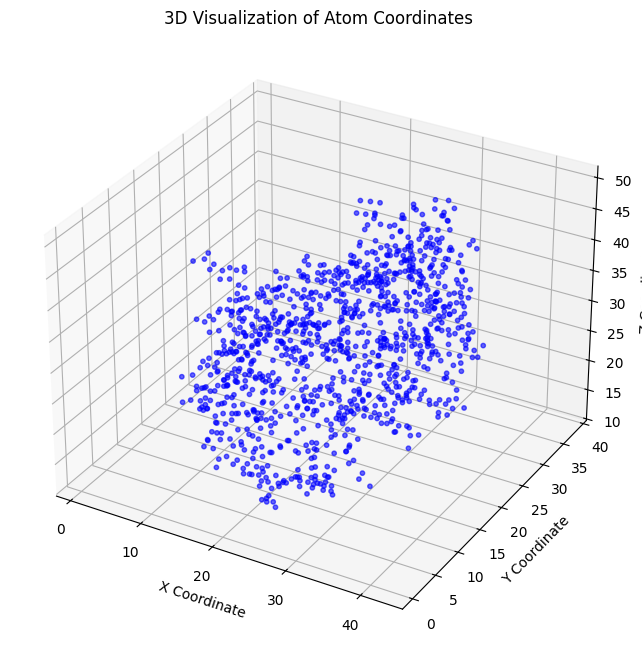

In [31]:
# 3D 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# x, y, z 좌표로 산점도 그리기
ax.scatter(group_A['x'], group_A['y'], group_A['z'], c='b', marker='o', s=10, alpha=0.6)

# 축 레이블 설정
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

# 그래프 제목 설정
ax.set_title('3D Visualization of Atom Coordinates')

plt.show()

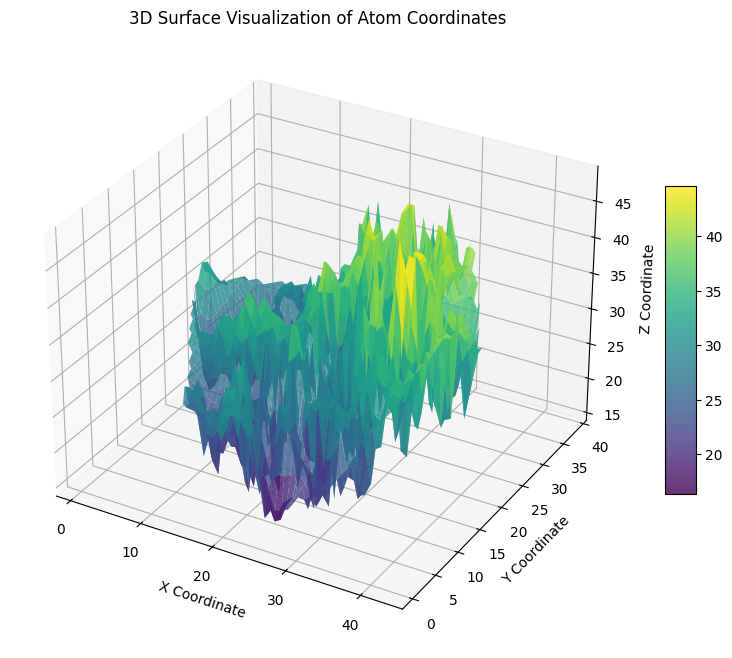

In [32]:
# x, y, z 데이터를 격자로 변환
x = group_A['x'].values
y = group_A['y'].values
z = group_A['z'].values

# 격자 생성
x_grid, y_grid = np.meshgrid(
    np.linspace(x.min(), x.max(), 50),
    np.linspace(y.min(), y.max(), 50)
)

# z 값을 보간하여 격자에 맞춤
z_grid = griddata((x, y), z, (x_grid, y_grid), method='linear')

# 3D 표면 그래프 그리기
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 표면 플롯
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none', alpha=0.8)

# 축 레이블 설정
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

# 컬러바 추가
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# 그래프 제목 설정
ax.set_title('3D Surface Visualization of Atom Coordinates')

plt.show()

In [33]:
# 3D 산점도 생성
fig = px.scatter_3d(group_A, x='x', y='y', z='z', color='res_name', title="3D Scatter Plot of group_A")
fig.update_layout(width=1200, height=800)
# 그래프 표시
fig.show()

# Load Data(ID : 6gh4)

In [180]:
# URL에서 직접 가져올 때
ID = '6gh4' # 예시로 사용할 PDB ID
url  = f"https://files.rcsb.org/download/{ID}.xml"
resp = requests.get(url)
resp.raise_for_status()
root = ET.fromstring(resp.content)

# 네임스페이스 정의
ns = {'PDBx': 'http://pdbml.pdb.org/schema/pdbx-v50.xsd'}

# Display all 18 columns for each atom in a formatted manner
print(f"{'atom_id':>8} | {'B_iso_or_equiv':>12} | {'Cartn_x':>8} | {'Cartn_y':>8} | {'Cartn_z':>8} | "
    f"{'auth_asym_id':>12} | {'auth_atom_id':>12} | {'auth_comp_id':>12} | {'auth_seq_id':>12} | "
    f"{'group_PDB':>10} | {'label_asym_id':>14} | {'label_atom_id':>14} | {'label_comp_id':>14} | "
    f"{'label_entity_id':>16} | {'label_seq_id':>14} | {'occupancy':>10} | {'pdbx_PDB_model_num':>18} | "
    f"{'type_symbol':>12}")
print("-" * 270)

for atom in root.findall('.//PDBx:atom_site', ns)[:5]:
    print(f"{atom.get('id', ''):>8} | {atom.find('PDBx:B_iso_or_equiv', ns).text or '':>12} | "
        f"{atom.find('PDBx:Cartn_x', ns).text or '':>8} | {atom.find('PDBx:Cartn_y', ns).text or '':>8} | "
        f"{atom.find('PDBx:Cartn_z', ns).text or '':>8} | {atom.find('PDBx:auth_asym_id', ns).text or '':>12} | "
        f"{atom.find('PDBx:auth_atom_id', ns).text or '':>12} | {atom.find('PDBx:auth_comp_id', ns).text or '':>12} | "
        f"{atom.find('PDBx:auth_seq_id', ns).text or '':>12} | {atom.find('PDBx:group_PDB', ns).text or '':>10} | "
        f"{atom.find('PDBx:label_asym_id', ns).text or '':>14} | {atom.find('PDBx:label_atom_id', ns).text or '':>14} | "
        f"{atom.find('PDBx:label_comp_id', ns).text or '':>14} | {atom.find('PDBx:label_entity_id', ns).text or '':>16} | "
        f"{atom.find('PDBx:label_seq_id', ns).text or '':>14} | {atom.find('PDBx:occupancy', ns).text or '':>10} | "
        f"{atom.find('PDBx:pdbx_PDB_model_num', ns).text or '':>18} | {atom.find('PDBx:type_symbol', ns).text or '':>12}")

 atom_id | B_iso_or_equiv |  Cartn_x |  Cartn_y |  Cartn_z | auth_asym_id | auth_atom_id | auth_comp_id |  auth_seq_id |  group_PDB |  label_asym_id |  label_atom_id |  label_comp_id |  label_entity_id |   label_seq_id |  occupancy | pdbx_PDB_model_num |  type_symbol
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
       1 |        43.83 |   21.937 |   -1.432 |    2.010 |            A |            N |          GLY |            1 |       ATOM |              A |              N |            GLY |                1 |              1 |       1.00 |                  1 |            N
       2 |        42.56 |   20.889 |   -2.346 |    2.424 |            A |           CA |          GLY |            1 |       ATOM |              A |             CA |            GLY |             

## 데이터 확인

In [43]:
# URL에서 직접 가져올 때
url  = "https://files.rcsb.org/download/6gh4.xml"
resp = requests.get(url)
resp.raise_for_status()
root = ET.fromstring(resp.content)

# 네임스페이스 정의
ns = {'PDBx': 'http://pdbml.pdb.org/schema/pdbx-v50.xsd'}

tp_atom = root.findall('.//PDBx:atom_site', ns)[0]
tp_atom

<Element '{http://pdbml.pdb.org/schema/pdbx-v50.xsd}atom_site' at 0x00000182565DF510>

In [44]:
tp_atom.get('id')

'1'

In [50]:
tp_atom.find('PDBx:B_iso_or_equiv', ns).text

'43.83'

In [51]:
tp_atom.find('PDBx:Cartn_x', ns).text

'21.937'

In [52]:
tp_atom.find('PDBx:B_iso_or_equiv', ns).text

'43.83'

## EDA

### DataFrame 만들기

In [132]:
atom_id_list, B_iso_or_equiv_list = [], []
Cartn_x_list, Cartn_y_list, Cartn_z_list = [], [], []
auth_asym_id_list, auth_atom_id_list, auth_comp_id_list, auth_seq_id_list = [], [], [], []
group_PDB_list = []
label_asym_id_list, label_atom_id_list, label_comp_id_list, label_entity_id_list, label_seq_id_list = [], [], [], [], []
occupancy_list, pdbx_PDB_model_num_list, type_symbol_list = [], [], []

for atom_site in root.findall('.//PDBx:atom_site', ns):
    atom_id = int(atom_site.attrib.get('id'))
    B_iso_or_equiv = atom_site.find('PDBx:B_iso_or_equiv', ns).text
    
    Cartn_x = atom_site.find('PDBx:Cartn_x', ns).text
    Cartn_y = atom_site.find('PDBx:Cartn_y', ns).text
    Cartn_z = atom_site.find('PDBx:Cartn_z', ns).text

    auth_asym_id = atom_site.find('PDBx:auth_asym_id', ns).text
    auth_atom_id = atom_site.find('PDBx:auth_atom_id', ns).text
    auth_comp_id = atom_site.find('PDBx:auth_comp_id', ns).text
    auth_seq_id = int(atom_site.find('PDBx:auth_seq_id', ns).text)
    
    group_PDB = atom_site.find('PDBx:group_PDB', ns).text

    label_asym_id = atom_site.find('PDBx:label_asym_id', ns).text
    label_atom_id = atom_site.find('PDBx:label_atom_id', ns).text
    label_comp_id = atom_site.find('PDBx:label_comp_id', ns).text
    label_entity_id = int(atom_site.find('PDBx:label_entity_id', ns).text)
    label_seq_id = atom_site.find('PDBx:label_seq_id', ns).text

    occupancy = atom_site.find('PDBx:occupancy', ns).text
    pdbx_PDB_model_num = int(atom_site.find('PDBx:pdbx_PDB_model_num', ns).text)
    type_symbol = atom_site.find('PDBx:type_symbol', ns).text
    
    # 빈 값 처리
    atom_id = int(atom_id) if atom_id else None
    B_iso_or_equiv = float(B_iso_or_equiv) if B_iso_or_equiv else None

    Cartn_x = float(Cartn_x) if Cartn_x else None
    Cartn_y = float(Cartn_y) if Cartn_y else None
    Cartn_z = float(Cartn_z) if Cartn_z else None

    auth_asym_id = auth_asym_id if auth_asym_id else None
    auth_atom_id = auth_atom_id if auth_atom_id else None
    auth_comp_id = auth_comp_id if auth_comp_id else None
    auth_seq_id = int(auth_seq_id) if auth_seq_id else None

    group_PDB = group_PDB if group_PDB else None

    label_asym_id = label_asym_id if label_asym_id else None
    label_atom_id = label_atom_id if label_atom_id else None
    label_comp_id = label_comp_id if label_comp_id else None
    label_entity_id = int(label_entity_id) if label_entity_id else None
    label_seq_id = label_seq_id if label_seq_id else None

    occupancy = float(occupancy) if occupancy else None
    pdbx_PDB_model_num = int(pdbx_PDB_model_num) if pdbx_PDB_model_num else None
    type_symbol = type_symbol if type_symbol else None

    # 리스트에 추가
    atom_id_list.append(atom_id)
    B_iso_or_equiv_list.append(B_iso_or_equiv)

    Cartn_x_list.append(Cartn_x)
    Cartn_y_list.append(Cartn_y)
    Cartn_z_list.append(Cartn_z)

    auth_asym_id_list.append(auth_asym_id)
    auth_atom_id_list.append(auth_atom_id)
    auth_comp_id_list.append(auth_comp_id)
    auth_seq_id_list.append(auth_seq_id)

    group_PDB_list.append(group_PDB)

    label_asym_id_list.append(label_asym_id)
    label_atom_id_list.append(label_atom_id)
    label_comp_id_list.append(label_comp_id)
    label_entity_id_list.append(label_entity_id)
    label_seq_id_list.append(label_seq_id)

    occupancy_list.append(occupancy)
    pdbx_PDB_model_num_list.append(pdbx_PDB_model_num)
    type_symbol_list.append(type_symbol)

In [133]:
print(f'atom_id_list 길이 : {len(atom_id_list)}')
print(f'B_iso_or_equiv_list 길이 : {len(B_iso_or_equiv_list)}')
print(f'Cartn_x_list 길이 : {len(Cartn_x_list)}')
print(f'Cartn_y_list 길이 : {len(Cartn_y_list)}')
print(f'Cartn_z_list 길이 : {len(Cartn_z_list)}')
print(f'auth_asym_id_list 길이 : {len(auth_asym_id_list)}')
print(f'auth_atom_id_list 길이 : {len(auth_atom_id_list)}')
print(f'auth_comp_id_list 길이 : {len(auth_comp_id_list)}')
print(f'auth_seq_id_list 길이 : {len(auth_seq_id_list)}')
print(f'group_PDB_list 길이 : {len(group_PDB_list)}')
print(f'label_asym_id_list 길이 : {len(label_asym_id_list)}')
print(f'label_atom_id_list 길이 : {len(label_atom_id_list)}')
print(f'label_comp_id_list 길이 : {len(label_comp_id_list)}')
print(f'label_entity_id_list 길이 : {len(label_entity_id_list)}')
print(f'label_seq_id_list 길이 : {len(label_seq_id_list)}')
print(f'occupancy_list 길이 : {len(occupancy_list)}')
print(f'pdbx_PDB_model_num_list 길이 : {len(pdbx_PDB_model_num_list)}')
print(f'type_symbol_list 길이 : {len(type_symbol_list)}')

atom_id_list 길이 : 13596
B_iso_or_equiv_list 길이 : 13596
Cartn_x_list 길이 : 13596
Cartn_y_list 길이 : 13596
Cartn_z_list 길이 : 13596
auth_asym_id_list 길이 : 13596
auth_atom_id_list 길이 : 13596
auth_comp_id_list 길이 : 13596
auth_seq_id_list 길이 : 13596
group_PDB_list 길이 : 13596
label_asym_id_list 길이 : 13596
label_atom_id_list 길이 : 13596
label_comp_id_list 길이 : 13596
label_entity_id_list 길이 : 13596
label_seq_id_list 길이 : 13596
occupancy_list 길이 : 13596
pdbx_PDB_model_num_list 길이 : 13596
type_symbol_list 길이 : 13596


In [134]:
# DataFrame 생성
df = pd.DataFrame({
    'atom_id': atom_id_list,
    'B_iso_or_equiv': B_iso_or_equiv_list,
    'Cartn_x': Cartn_x_list,
    'Cartn_y': Cartn_y_list,
    'Cartn_z': Cartn_z_list,
    'auth_asym_id': auth_asym_id_list,
    'auth_atom_id': auth_atom_id_list,
    'auth_comp_id': auth_comp_id_list,
    'auth_seq_id': auth_seq_id_list,
    'group_PDB': group_PDB_list,
    'label_asym_id': label_asym_id_list,
    'label_atom_id': label_atom_id_list,
    'label_comp_id': label_comp_id_list,
    'label_entity_id': label_entity_id_list,
    'label_seq_id': label_seq_id_list,
    'occupancy': occupancy_list,
    'pdbx_PDB_model_num': pdbx_PDB_model_num_list,
    'type_symbol': type_symbol_list
})

df.head()

,atom_id,B_iso_or_equiv,Cartn_x,Cartn_y,Cartn_z,auth_asym_id,auth_atom_id,auth_comp_id,auth_seq_id,group_PDB,label_asym_id,label_atom_id,label_comp_id,label_entity_id,label_seq_id,occupancy,pdbx_PDB_model_num,type_symbol
0,1,43.83,21.937,-1.432,2.010,A,N,GLY,1,ATOM,A,N,GLY,1,1,1.0,1,N
1,2,42.56,20.889,-2.346,2.424,A,CA,GLY,1,ATOM,A,CA,GLY,1,1,1.0,1,C
2,3,37.44,20.228,-3.048,1.255,A,C,GLY,1,ATOM,A,C,GLY,1,1,1.0,1,C
3,4,36.22,20.665,-2.909,0.113,A,O,GLY,1,ATOM,A,O,GLY,1,1,1.0,1,O
4,5,34.06,19.171,-3.802,1.541,A,N,SER,2,ATOM,A,N,SER,1,2,1.0,1,N


### 특성 분석

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13596 entries, 0 to 13595
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   atom_id             13596 non-null  int64  
 1   B_iso_or_equiv      13596 non-null  float64
 2   Cartn_x             13596 non-null  float64
 3   Cartn_y             13596 non-null  float64
 4   Cartn_z             13596 non-null  float64
 5   auth_asym_id        13596 non-null  object 
 6   auth_atom_id        13596 non-null  object 
 7   auth_comp_id        13596 non-null  object 
 8   auth_seq_id         13596 non-null  int64  
 9   group_PDB           13596 non-null  object 
 10  label_asym_id       13596 non-null  object 
 11  label_atom_id       13596 non-null  object 
 12  label_comp_id       13596 non-null  object 
 13  label_entity_id     13596 non-null  int64  
 14  label_seq_id        12544 non-null  object 
 15  occupancy           13596 non-null  float64
 16  pdbx

In [136]:
df.columns

Index(['atom_id', 'B_iso_or_equiv', 'Cartn_x', 'Cartn_y', 'Cartn_z',
       'auth_asym_id', 'auth_atom_id', 'auth_comp_id', 'auth_seq_id',
       'group_PDB', 'label_asym_id', 'label_atom_id', 'label_comp_id',
       'label_entity_id', 'label_seq_id', 'occupancy', 'pdbx_PDB_model_num',
       'type_symbol'],
      dtype='object')

#### atom_id

In [137]:
df.atom_id.describe()

count    13596.000000
mean      6798.500000
std       3924.971465
min          1.000000
25%       3399.750000
50%       6798.500000
75%      10197.250000
max      13596.000000
Name: atom_id, dtype: float64

#### B_iso_or_equiv

In [138]:
df.B_iso_or_equiv.describe()

count    13596.000000
mean        28.349197
std         11.887174
min          7.010000
25%         19.710000
50%         25.540000
75%         34.400000
max         89.290000
Name: B_iso_or_equiv, dtype: float64

#### Cartn_x, Cartn_y, Cartn_z

In [139]:
df[['Cartn_x', 'Cartn_y', 'Cartn_z']].describe()

,Cartn_x,Cartn_y,Cartn_z
count,13596.000000,13596.000000,13596.000000
mean,15.704882,16.178236,26.556555
std,14.558616,24.567342,31.931595
min,-27.689000,-42.469000,-46.622000
25%,5.898000,-3.396250,-0.749750
50%,16.550000,16.027500,26.507500
75%,26.765750,36.098750,54.175000
max,50.339000,73.768000,94.771000


#### auth_asym_id

In [140]:
df.auth_asym_id.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'P', 'Q', 'R', 'Y'],
      dtype=object)

#### auth_atom_id

In [141]:
df.auth_atom_id.unique()

array(['N', 'CA', 'C', 'O', 'CB', 'OG', 'CG', 'ND1', 'CD2', 'CE1', 'NE2',
       'CD1', 'CD', 'CE', 'NZ', 'CE2', 'CZ', 'OH', 'OG1', 'CG2', 'CG1',
       'NE', 'NH1', 'NH2', 'OE1', 'OE2', 'OD1', 'OD2', 'ND2', 'SD', 'NE1',
       'CE3', 'CZ2', 'CZ3', 'CH2', 'SG', 'OXT', 'S', 'O1', 'O2', 'O3',
       'O4', 'ZN'], dtype=object)

#### auth_comp_id

In [142]:
df.auth_comp_id.unique()

array(['GLY', 'SER', 'HIS', 'LEU', 'LYS', 'TYR', 'PHE', 'THR', 'VAL',
       'ARG', 'PRO', 'GLU', 'ILE', 'ASP', 'GLN', 'ASN', 'ALA', 'MET',
       'TRP', 'CYS', 'SO4', 'ZN', 'HOH'], dtype=object)

In [143]:
len(df.auth_comp_id.unique())

23

#### auth_seq_id

In [144]:
df.auth_seq_id.describe()

count    13596.000000
mean       133.917770
std        113.619747
min          1.000000
25%         49.000000
50%         99.000000
75%        201.000000
max        580.000000
Name: auth_seq_id, dtype: float64

In [145]:
df.auth_seq_id.tail()

13591    101
13592    102
13593    103
13594    104
13595    105
Name: auth_seq_id, dtype: int64

#### group_PDB

In [146]:
df.group_PDB.unique()

array(['ATOM', 'HETATM'], dtype=object)

#### label_asym_id

In [147]:
df.label_asym_id.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       'AA', 'BA', 'CA', 'DA', 'EA', 'FA'], dtype=object)

In [148]:
print(df.auth_asym_id.unique())
print(df.label_asym_id.unique())
print()
print(len(df.auth_asym_id.unique()))
print(len(df.label_asym_id.unique()))

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'P' 'Q' 'R' 'Y']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'AA' 'BA' 'CA' 'DA' 'EA' 'FA']

12
32


#### label_atom_id

In [149]:
df.label_atom_id.unique()

array(['N', 'CA', 'C', 'O', 'CB', 'OG', 'CG', 'ND1', 'CD2', 'CE1', 'NE2',
       'CD1', 'CD', 'CE', 'NZ', 'CE2', 'CZ', 'OH', 'OG1', 'CG2', 'CG1',
       'NE', 'NH1', 'NH2', 'OE1', 'OE2', 'OD1', 'OD2', 'ND2', 'SD', 'NE1',
       'CE3', 'CZ2', 'CZ3', 'CH2', 'SG', 'OXT', 'S', 'O1', 'O2', 'O3',
       'O4', 'ZN'], dtype=object)

In [150]:
print(df.auth_atom_id.unique())
print(df.label_atom_id.unique())
print()
print(len(df.auth_atom_id.unique()))
print(len(df.label_atom_id.unique()))

['N' 'CA' 'C' 'O' 'CB' 'OG' 'CG' 'ND1' 'CD2' 'CE1' 'NE2' 'CD1' 'CD' 'CE'
 'NZ' 'CE2' 'CZ' 'OH' 'OG1' 'CG2' 'CG1' 'NE' 'NH1' 'NH2' 'OE1' 'OE2' 'OD1'
 'OD2' 'ND2' 'SD' 'NE1' 'CE3' 'CZ2' 'CZ3' 'CH2' 'SG' 'OXT' 'S' 'O1' 'O2'
 'O3' 'O4' 'ZN']
['N' 'CA' 'C' 'O' 'CB' 'OG' 'CG' 'ND1' 'CD2' 'CE1' 'NE2' 'CD1' 'CD' 'CE'
 'NZ' 'CE2' 'CZ' 'OH' 'OG1' 'CG2' 'CG1' 'NE' 'NH1' 'NH2' 'OE1' 'OE2' 'OD1'
 'OD2' 'ND2' 'SD' 'NE1' 'CE3' 'CZ2' 'CZ3' 'CH2' 'SG' 'OXT' 'S' 'O1' 'O2'
 'O3' 'O4' 'ZN']

43
43


#### label_comp_id

In [151]:
print(len(df.label_comp_id.unique()))
df.label_comp_id.unique()

23


array(['GLY', 'SER', 'HIS', 'LEU', 'LYS', 'TYR', 'PHE', 'THR', 'VAL',
       'ARG', 'PRO', 'GLU', 'ILE', 'ASP', 'GLN', 'ASN', 'ALA', 'MET',
       'TRP', 'CYS', 'SO4', 'ZN', 'HOH'], dtype=object)

#### label_entity_id

In [152]:
df.label_entity_id.unique()

array([1, 2, 3, 4, 5, 6])

#### label_seq_id

In [153]:
df.label_seq_id.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [154]:
df[df['label_seq_id'].isna()]

,atom_id,B_iso_or_equiv,Cartn_x,Cartn_y,Cartn_z,auth_asym_id,auth_atom_id,auth_comp_id,auth_seq_id,group_PDB,label_asym_id,label_atom_id,label_comp_id,label_entity_id,label_seq_id,occupancy,pdbx_PDB_model_num,type_symbol
12544,12545,71.27,-14.874,1.300,-13.377,A,S,SO4,301,HETATM,M,S,SO4,4,None,1.0,1,S
12545,12546,69.78,-14.089,1.170,-14.601,A,O1,SO4,301,HETATM,M,O1,SO4,4,None,1.0,1,O
12546,12547,71.71,-16.280,1.044,-13.674,A,O2,SO4,301,HETATM,M,O2,SO4,4,None,1.0,1,O
12547,12548,70.64,-14.402,0.335,-12.389,A,O3,SO4,301,HETATM,M,O3,SO4,4,None,1.0,1,O
12548,12549,73.09,-14.729,2.651,-12.844,A,O4,SO4,301,HETATM,M,O4,SO4,4,None,1.0,1,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13591,13592,21.53,13.766,59.528,20.223,Y,O,HOH,101,HETATM,FA,O,HOH,6,None,1.0,1,O
13592,13593,32.08,30.576,48.734,18.644,Y,O,HOH,102,HETATM,FA,O,HOH,6,None,1.0,1,O
13593,13594,43.95,21.013,61.812,18.349,Y,O,HOH,103,HETATM,FA,O,HOH,6,None,1.0,1,O
13594,13595,22.49,27.972,53.375,19.586,Y,O,HOH,104,HETATM,FA,O,HOH,6,None,1.0,1,O


In [155]:
df[df['label_seq_id'].isna()]['group_PDB'].unique()

array(['HETATM'], dtype=object)

#### occupancy

In [156]:
df.occupancy.unique()

array([1.])

In [157]:
df.occupancy.value_counts()

occupancy
1.0    13596
Name: count, dtype: int64

#### pdbx_PDB_model_num

In [158]:
df.pdbx_PDB_model_num.unique()

array([1])

In [159]:
df.pdbx_PDB_model_num.value_counts()

pdbx_PDB_model_num
1    13596
Name: count, dtype: int64

#### type_symbol

In [160]:
df.type_symbol.unique()

array(['N', 'C', 'O', 'S', 'ZN'], dtype=object)

# 전처리

### 원소와 용매 분리
- group_PDB의 ATOM만 사용
- group_PDB의 HETATM는 용매

In [161]:
atom_df = df[df['group_PDB'] == 'ATOM']
atom_df

,atom_id,B_iso_or_equiv,Cartn_x,Cartn_y,Cartn_z,auth_asym_id,auth_atom_id,auth_comp_id,auth_seq_id,group_PDB,label_asym_id,label_atom_id,label_comp_id,label_entity_id,label_seq_id,occupancy,pdbx_PDB_model_num,type_symbol
0,1,43.83,21.937,-1.432,2.010,A,N,GLY,1,ATOM,A,N,GLY,1,1,1.0,1,N
1,2,42.56,20.889,-2.346,2.424,A,CA,GLY,1,ATOM,A,CA,GLY,1,1,1.0,1,C
2,3,37.44,20.228,-3.048,1.255,A,C,GLY,1,ATOM,A,C,GLY,1,1,1.0,1,C
3,4,36.22,20.665,-2.909,0.113,A,O,GLY,1,ATOM,A,O,GLY,1,1,1.0,1,O
4,5,34.06,19.171,-3.802,1.541,A,N,SER,2,ATOM,A,N,SER,1,2,1.0,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12539,12540,23.11,15.392,60.250,15.920,Y,CB,LEU,9,ATOM,L,CB,LEU,3,9,1.0,1,C
12540,12541,21.33,16.289,59.308,15.113,Y,CG,LEU,9,ATOM,L,CG,LEU,3,9,1.0,1,C
12541,12542,23.16,15.471,58.511,14.108,Y,CD1,LEU,9,ATOM,L,CD1,LEU,3,9,1.0,1,C
12542,12543,19.16,17.386,60.094,14.412,Y,CD2,LEU,9,ATOM,L,CD2,LEU,3,9,1.0,1,C


### 🔺펩타이드와 단백질 구분
- (논의중)같은 auth_asym_id의 샘플 수가 'X'개 이상이면 단백질, 미만이면 펩타이드

In [162]:
eval_df = atom_df.groupby(atom_df['auth_asym_id'], as_index=False).agg({'auth_seq_id':'nunique'})
eval_df

,auth_asym_id,auth_seq_id
0,A,274
1,B,100
2,C,274
3,D,100
4,E,273
5,F,100
6,G,274
7,H,100
8,P,9
9,Q,9


In [163]:
temp_eval_df = eval_df.copy()

In [164]:
temp_eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   auth_asym_id  12 non-null     object
 1   auth_seq_id   12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [165]:
sample_count_threshold = 10
temp_eval_df['group'] = temp_eval_df['auth_seq_id'].apply(lambda x: 'protein' if x >= sample_count_threshold else 'peptide')

In [166]:
temp_eval_df

,auth_asym_id,auth_seq_id,group
0,A,274,protein
1,B,100,protein
2,C,274,protein
3,D,100,protein
4,E,273,protein
5,F,100,protein
6,G,274,protein
7,H,100,protein
8,P,9,peptide
9,Q,9,peptide


In [167]:
temp_atom_df = atom_df.copy()

In [168]:
temp_merged_atom_df = temp_atom_df.merge(temp_eval_df[['auth_asym_id', 'group']], on='auth_asym_id', how='left')
temp_merged_atom_df

,atom_id,B_iso_or_equiv,Cartn_x,Cartn_y,Cartn_z,auth_asym_id,auth_atom_id,auth_comp_id,auth_seq_id,group_PDB,label_asym_id,label_atom_id,label_comp_id,label_entity_id,label_seq_id,occupancy,pdbx_PDB_model_num,type_symbol,group
0,1,43.83,21.937,-1.432,2.010,A,N,GLY,1,ATOM,A,N,GLY,1,1,1.0,1,N,protein
1,2,42.56,20.889,-2.346,2.424,A,CA,GLY,1,ATOM,A,CA,GLY,1,1,1.0,1,C,protein
2,3,37.44,20.228,-3.048,1.255,A,C,GLY,1,ATOM,A,C,GLY,1,1,1.0,1,C,protein
3,4,36.22,20.665,-2.909,0.113,A,O,GLY,1,ATOM,A,O,GLY,1,1,1.0,1,O,protein
4,5,34.06,19.171,-3.802,1.541,A,N,SER,2,ATOM,A,N,SER,1,2,1.0,1,N,protein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12539,12540,23.11,15.392,60.250,15.920,Y,CB,LEU,9,ATOM,L,CB,LEU,3,9,1.0,1,C,peptide
12540,12541,21.33,16.289,59.308,15.113,Y,CG,LEU,9,ATOM,L,CG,LEU,3,9,1.0,1,C,peptide
12541,12542,23.16,15.471,58.511,14.108,Y,CD1,LEU,9,ATOM,L,CD1,LEU,3,9,1.0,1,C,peptide
12542,12543,19.16,17.386,60.094,14.412,Y,CD2,LEU,9,ATOM,L,CD2,LEU,3,9,1.0,1,C,peptide


In [169]:
temp_merged_atom_df.groupby('auth_asym_id')['group'].unique()

auth_asym_id
A    [protein]
B    [protein]
C    [protein]
D    [protein]
E    [protein]
F    [protein]
G    [protein]
H    [protein]
P    [peptide]
Q    [peptide]
R    [peptide]
Y    [peptide]
Name: group, dtype: object

In [170]:
temp_merged_atom_df.loc[temp_merged_atom_df['auth_asym_id'] == 'A', 'group'].unique()

array(['protein'], dtype=object)

In [171]:
unique_counts = atom_df.groupby('auth_asym_id')['auth_seq_id'].nunique()
unique_counts

auth_asym_id
A    274
B    100
C    274
D    100
E    273
F    100
G    274
H    100
P      9
Q      9
R      9
Y      9
Name: auth_seq_id, dtype: int64

In [172]:
unique_counts['A']

np.int64(274)

#### 분류 최종 코드

In [174]:
sample_count_threshold = 10

# auth_asym_id별 auth_seq_id의 유니크 개수 계산
unique_counts = atom_df.groupby('auth_asym_id')['auth_seq_id'].nunique()

# 조건에 따라 'protein' 또는 'peptide' 값을 할당
atom_df.loc[:, 'group'] = atom_df['auth_asym_id'].map(lambda x: 'protein' if unique_counts[x] >= sample_count_threshold else 'peptide') # apply도 동일한 기능이나 샘플이 많아지면 map의 속도가 빠름.

# 결과 확인
atom_df.head()

,atom_id,B_iso_or_equiv,Cartn_x,Cartn_y,Cartn_z,auth_asym_id,auth_atom_id,auth_comp_id,auth_seq_id,group_PDB,label_asym_id,label_atom_id,label_comp_id,label_entity_id,label_seq_id,occupancy,pdbx_PDB_model_num,type_symbol,group
0,1,43.83,21.937,-1.432,2.010,A,N,GLY,1,ATOM,A,N,GLY,1,1,1.0,1,N,protein
1,2,42.56,20.889,-2.346,2.424,A,CA,GLY,1,ATOM,A,CA,GLY,1,1,1.0,1,C,protein
2,3,37.44,20.228,-3.048,1.255,A,C,GLY,1,ATOM,A,C,GLY,1,1,1.0,1,C,protein
3,4,36.22,20.665,-2.909,0.113,A,O,GLY,1,ATOM,A,O,GLY,1,1,1.0,1,O,protein
4,5,34.06,19.171,-3.802,1.541,A,N,SER,2,ATOM,A,N,SER,1,2,1.0,1,N,protein


In [175]:
atom_df.groupby('auth_asym_id')['group'].unique()

auth_asym_id
A    [protein]
B    [protein]
C    [protein]
D    [protein]
E    [protein]
F    [protein]
G    [protein]
H    [protein]
P    [peptide]
Q    [peptide]
R    [peptide]
Y    [peptide]
Name: group, dtype: object

# END